In [0]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 102kB/s 
     |████████████████████████████████| 20.2MB 22.9MB/s 
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.4
    Uninstalling numpy-1.18.4:
      Successfully uninstalled numpy-1.18.4
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [0]:
# import basic functions
import numpy as np 
import cv2
import glob
import os 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


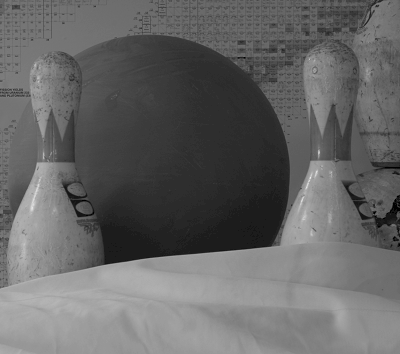

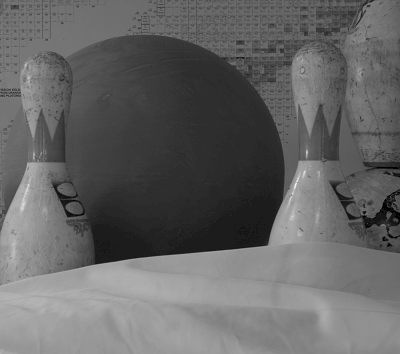

[[ 98  98  99 ... 105 101  95]
 [ 96 101  98 ... 109 103  99]
 [ 95  99  98 ... 106 101  99]
 ...
 [170 170 169 ... 133 133 134]
 [171 170 170 ... 132 133 135]
 [172 170 170 ... 133 134 132]]
uint8


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


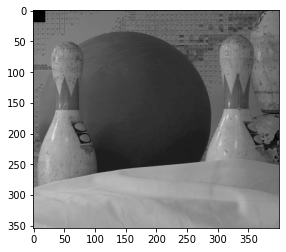

In [0]:
# Function to calculate disparity, takes a lot of time due to high window size
image1=cv2.imread('./view0.png',cv2.IMREAD_GRAYSCALE)
image2=cv2.imread('./view1.png',cv2.IMREAD_GRAYSCALE)
cv2_imshow(image1)
cv2_imshow(image2)

image1.shape[1]
def patch(Il,IR,xl,xr,yl,yr,a,b,):
  cost=0
  x11=max(xl-10,0)
  x22=max(xr-10,0)
  y11=max(yl-10,0)
  y22=max(yr-10,0)
  for i in range(0,20,1):
    for j in range(0,20,1):
      x11=min(xl+i,a-1)
      y11=min(yl+i,b-1)
      x22=min(xr+i,a-1)
      y22=min(yr+i,b-1)
      cost+=(Il[x11][y11]-IR[x22][y22])**2
  return [cost,yr]
row,col=image1.shape
disparity=image1
print(disparity)
print(disparity.dtype)
for i in range(int(20)):
  for j in range(int(20)):
    #i,j, is xl yl now find xr
    costs=[[100000000000000000000000,0]]
    for k in range(0,j,1):
      costs=costs+[patch(image1,image2,i,i,j,k,image1.shape[0],image1.shape[1])]
    A=sorted(costs)
    # print(A[0][0])
    val=(j-A[0][1])/image1.shape[1]
    val=val*255
    val=int(val)
    # print(val)
    disparity[i][j]=val
plt.imshow(disparity,'gray')
# print(image3)  
# disparity=image3

In [0]:
ls

sample_data/
